<a href="https://colab.research.google.com/github/Nsmanik/AI_phase-1/blob/main/Cuisine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv("/content/Dataset.csv")

# Display basic info
print("Shape of Dataset:", df.shape)
df.head()


Shape of Dataset: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Drop rows with missing 'Cuisines'
df = df.dropna(subset=['Cuisines'])

# Extract only the first listed cuisine
df['Primary_Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Select necessary columns
selected_cols = ['Primary_Cuisine', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'City']
df = df[selected_cols].dropna()

# Encode categorical features
le_city = LabelEncoder()
df['City_encoded'] = le_city.fit_transform(df['City'])

le_cuisine = LabelEncoder()
df['Cuisine_encoded'] = le_cuisine.fit_transform(df['Primary_Cuisine'])


<ipython-input-8-4ff7d9bcd2ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Primary_Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())


In [ ]:
X = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'City_encoded']]
y = df['Cuisine_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Get only labels used in test and prediction
used_labels = np.unique(np.concatenate((y_test, y_pred)))
used_class_names = le_cuisine.inverse_transform(used_labels)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(
    y_test, y_pred, labels=used_labels, target_names=used_class_names))


✅ Accuracy: 0.27920377160817184

📊 Classification Report:
                    precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         1
          African       0.00      0.00      0.00         0
         American       0.17      0.22      0.19        55
           Andhra       0.00      0.00      0.00         1
          Arabian       0.00      0.00      0.00         0
            Asian       0.12      0.06      0.08        17
     Asian Fusion       0.00      0.00      0.00         1
         Assamese       0.00      0.00      0.00         0
              BBQ       0.00      0.00      0.00         5
           Bakery       0.17      0.17      0.17       109
         Bar Food       0.00      0.00      0.00         6
          Bengali       0.00      0.00      0.00         4
        Beverages       0.17      0.08      0.11        13
          Biryani       0.08      0.05      0.06        22
        Brazilian       0.20      0.25      0.22       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
report = classification_report(y_test, y_pred, labels=used_labels, target_names=used_class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report[['precision', 'recall', 'f1-score']].head(10)  # show top 10 cuisines


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

,precision,recall,f1-score
Afghani,0.000000,0.000000,0.000000
African,0.000000,0.000000,0.000000
American,0.169014,0.218182,0.190476
Andhra,0.000000,0.000000,0.000000
Arabian,0.000000,0.000000,0.000000
Asian,0.125000,0.058824,0.080000
Asian Fusion,0.000000,0.000000,0.000000
Assamese,0.000000,0.000000,0.000000
BBQ,0.000000,0.000000,0.000000
Bakery,0.174757,0.165138,0.169811


from matplotlib import pyplot as plt
_df_0['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

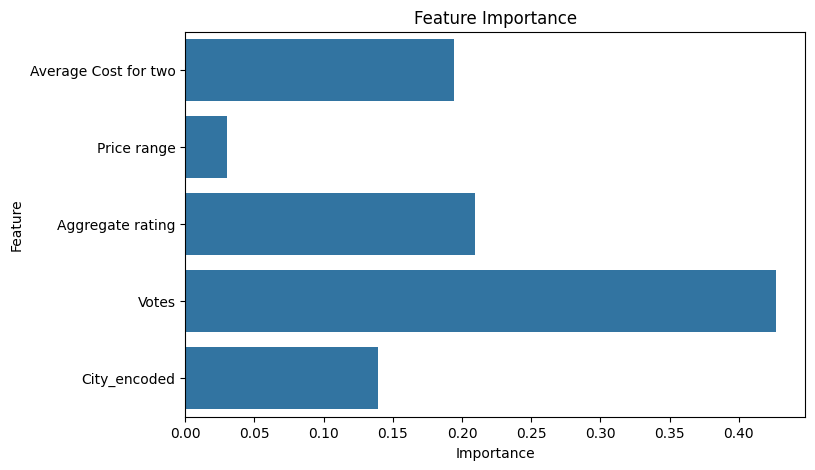

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 📌 Step 2: Load the dataset
df = pd.read_csv("Dataset.csv", encoding='latin-1')

# 📌 Step 3: Drop missing values (if any)
df.dropna(inplace=True)

# 📌 Step 4: Create Primary_Cuisine column from 'Cuisines'
df['Primary_Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# 📌 Step 5: Keep only cuisines with ≥ 50 samples
cuisine_counts = df['Primary_Cuisine'].value_counts()
popular_cuisines = cuisine_counts[cuisine_counts >= 50].index
df_filtered = df[df['Primary_Cuisine'].isin(popular_cuisines)].copy()

# 📌 Step 6: Encode categorical 'City' and 'Cuisine'
le_city = LabelEncoder()
df_filtered['City_encoded'] = le_city.fit_transform(df_filtered['City'])

le_cuisine = LabelEncoder()
df_filtered['Cuisine_encoded'] = le_cuisine.fit_transform(df_filtered['Primary_Cuisine'])

# 📌 Step 7: Define features (X) and target (y)
X = df_filtered[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'City_encoded']]
y = df_filtered['Cuisine_encoded']

# 📌 Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 9: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 Step 10: Make predictions and evaluate
y_pred = model.predict(X_test)

# 📌 Step 11: Accuracy and report (only for used classes)
used_labels = np.unique(np.concatenate((y_test, y_pred)))
used_class_names = le_cuisine.inverse_transform(used_labels)

print(" Improved Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, labels=used_labels, target_names=used_class_names))


✅ Improved Accuracy: 0.30674157303370786

📊 Classification Report:
               precision    recall  f1-score   support

    American       0.28      0.40      0.33        60
       Asian       0.00      0.00      0.00        14
      Bakery       0.19      0.14      0.16       129
   Beverages       0.22      0.12      0.15        17
     Biryani       0.12      0.11      0.11        18
      Burger       0.00      0.00      0.00        30
        Cafe       0.23      0.26      0.25       118
     Chinese       0.11      0.06      0.08       186
 Continental       0.08      0.04      0.05        56
    Desserts       0.18      0.12      0.14        26
    European       0.00      0.00      0.00         8
   Fast Food       0.16      0.11      0.13       132
 Finger Food       0.55      0.33      0.41        18
Healthy Food       0.00      0.00      0.00         9
   Ice Cream       0.19      0.15      0.17        34
      Indian       0.23      0.25      0.24        12
     Italian 